# Let us import required libraries

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import missingno as msno

# Now, we will load data into dataframe using pandas

In [ ]:
df = pd.read_csv("/content/USA_Housing.csv")
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


# will check the missing data using missingno library .It show the matrix like plot,by that we can clearly understand where and how much data is missing




<Axes: >

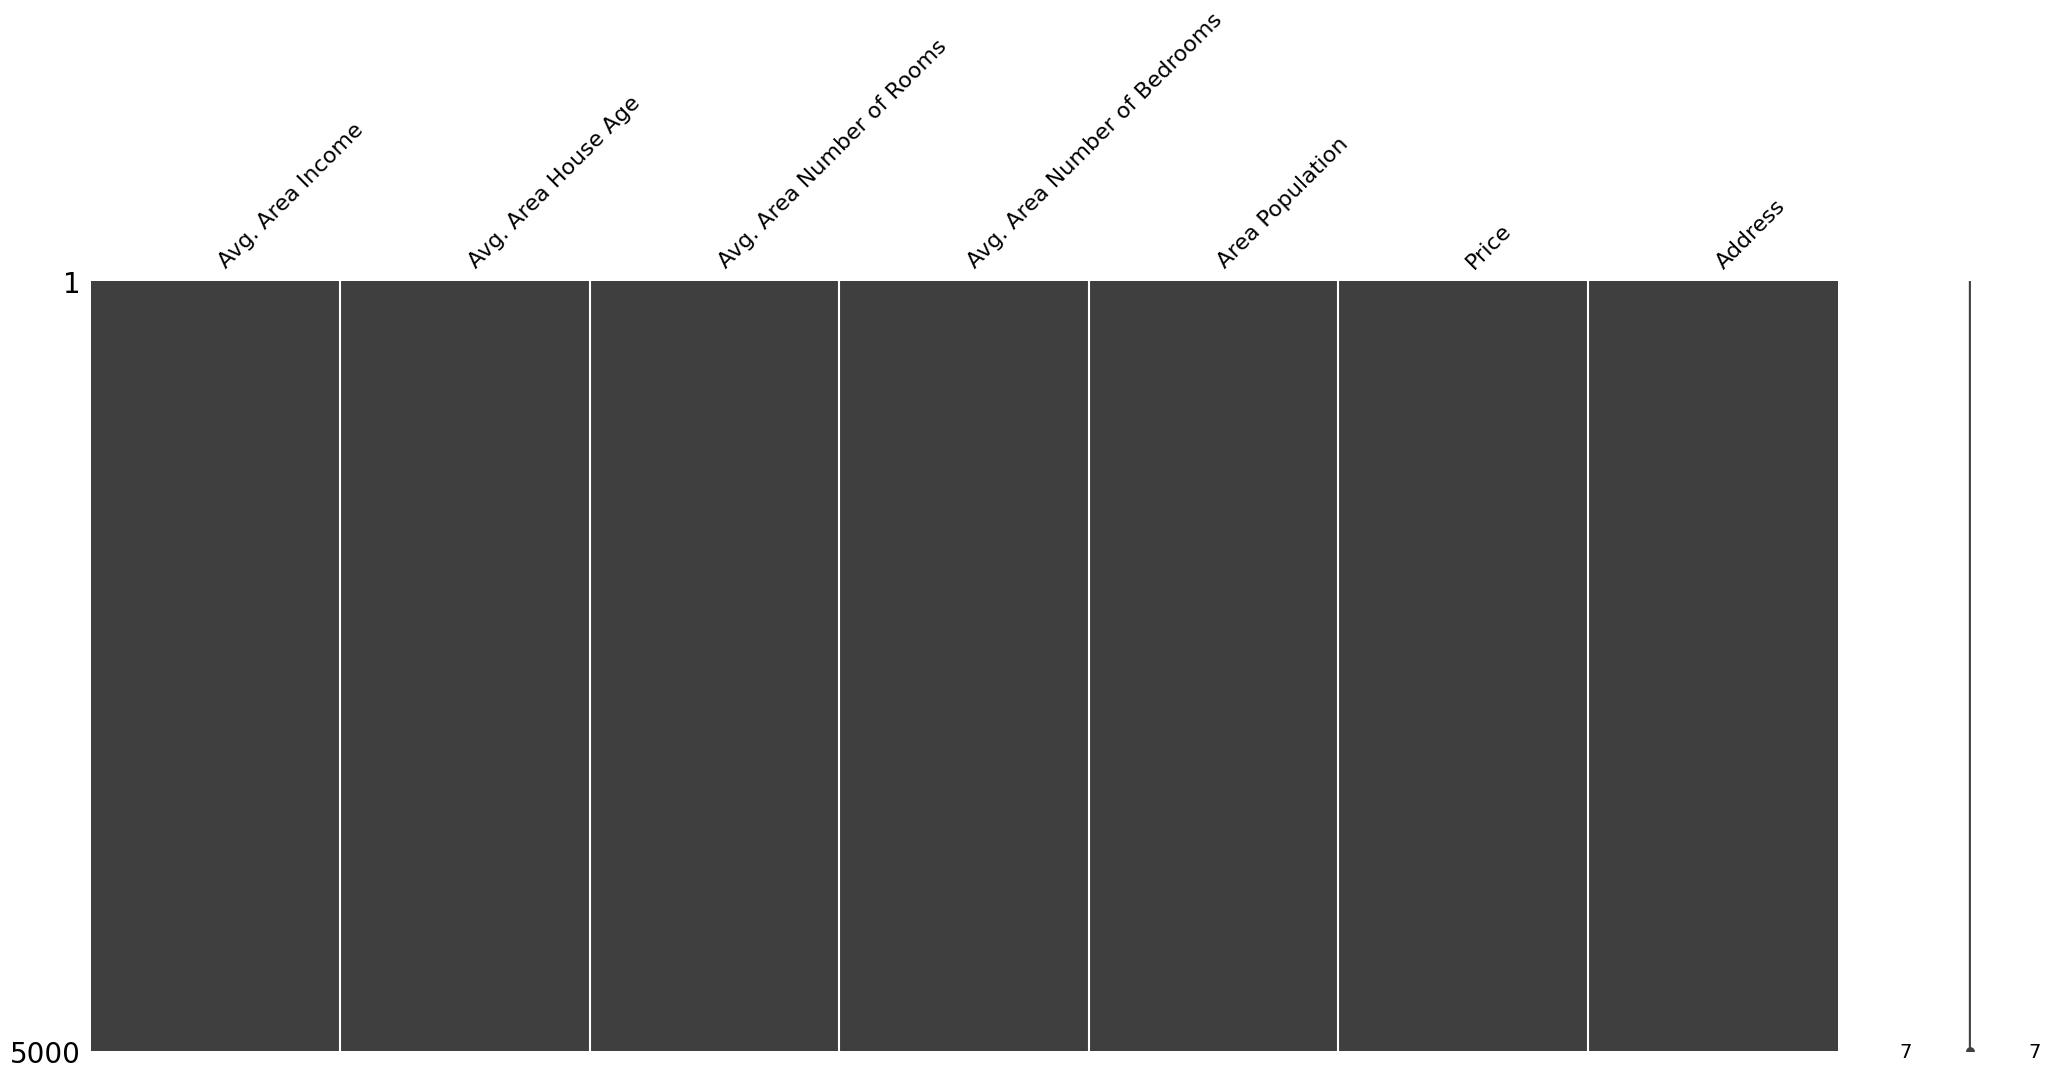

In [ ]:
msno.matrix(df)

# There is no missing data, acording to the above plot, so we dont need to need to add or remove any of the data. Now will delete the unrequired data

In [ ]:
df=df.drop("Address",axis=1)
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


Now Let us split the data into X and Y, Then will divide it into train and test data

In [ ]:
X_data=df.drop("Price",axis=1)                  # Taking the independent features into X
Y_data=df["Price"].astype("int")                # Taking the dependent feature or target feature into Y

# now we will divide and scale the data.
x_train=X_data.sample(int(0.8*len(X_data)),random_state=10)     # taking the 80% of data into X_training
y_train=Y_data[x_train.index]                                   # and taking Y_trainging for the X_training data
x_test=X_data.drop(x_train.index)                               # Loading the x test data by droping the x_train data from X data
x_train=np.array(x_train)                                       # converting dataframe into array, this helps us for frature implementation
x_train = x_train.reshape(x_train.shape[0], 1, x_train.shape[1])# reshaping x_train, by that we can have a clear image to pass in the model


x_test=np.array(x_test)                                         # coverting dataframe into array
x_test = x_test.reshape(x_test.shape[0], 1, x_test.shape[1])    #reshaping x_test
y_test=Y_data.drop(y_train.index)



#  Now we define a model using keras.mdoels and keras.Layers

In [ ]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Dense(20,input_shape=(1,5),activation="relu"),   # adding the Dense layer with activation and input shape(itself takes the input layer)
    tf.keras.layers.Dense(10,activation="relu"),                     # adding one more dense layer, ""adding number of layers and neurons is based on trail and error""
    tf.keras.layers.Dense(1,"relu")                                  # In last layer the number of units will based on problem, here in regression it requires 1 unit
])

model.compile(loss="mean_squared_error",optimizer="adam")            # after defining a model, we should compile it with hyperparameter loss, optimizer

In [ ]:
model.fit(x_test,y_test,epochs=20,batch_size=32)


Epoch 1/20
32/32 [==============================] - 2s 5ms/step - loss: 1614229798912.0000
Epoch 2/20
32/32 [==============================] - 0s 5ms/step - loss: 1547055661056.0000
Epoch 3/20
32/32 [==============================] - 0s 5ms/step - loss: 1465011404800.0000
Epoch 4/20
32/32 [==============================] - 0s 5ms/step - loss: 1337425002496.0000
Epoch 5/20
32/32 [==============================] - 0s 6ms/step - loss: 1151946850304.0000
Epoch 6/20
32/32 [==============================] - 0s 5ms/step - loss: 920689377280.0000
Epoch 7/20
32/32 [==============================] - 0s 5ms/step - loss: 642667577344.0000
Epoch 8/20
32/32 [==============================] - 0s 7ms/step - loss: 359315996672.0000
Epoch 9/20
32/32 [==============================] - 0s 8ms/step - loss: 168300183552.0000
Epoch 10/20
32/32 [==============================] - 0s 8ms/step - loss: 85471305728.0000
Epoch 11/20
32/32 [==============================] - 0s 7ms/step - loss: 65049853952.0000
Epoch

# If the model didn't performed well you can tune the model by changing the hyperparameter

In [ ]:
model.evaluate(x_test,y_test)        # evaluate the model

32/32 [==============================] - 0s 4ms/step - loss: 62359207936.0000


62359207936.0

In [ ]:
y_pred=model.predict(x_test)        # predicting price for the test data
y_pred=y_pred.reshape(-1,)


32/32 [==============================] - 0s 3ms/step


# Will plot for the predicted_values and actual_values

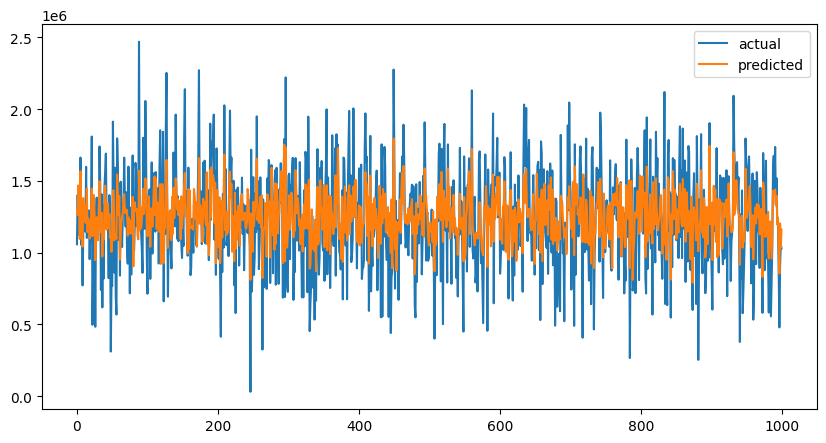

In [ ]:
from sqlalchemy import label
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(range(1000),y_test,label="actual")
ax.plot(range(1000),y_pred,label="predicted")
plt.legend()